## GROUP 3


PREM S.

SHALIN V.

In [20]:
# Import necessary libraries
import cv2  # OpenCV library for image processing
import numpy as np  # NumPy library for numerical operations
import matplotlib.pyplot as plt  # Matplotlib library for plotting
from skimage import img_as_float  # skimage library for image conversion
from scipy.signal import wiener  # SciPy library for Wiener filter
import bm3d  # bm3d library for BM3D denoising algorithm
# skimage metrics for image quality assessment
from skimage.metrics import peak_signal_noise_ratio, structural_similarity, mean_squared_error

In [11]:
# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, sigma=25):
    h, w, c = image.shape
    gaussian_noise = np.random.normal(mean, sigma, (h, w, c))
    noisy_image = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)
    return noisy_image

In [12]:
# Load the image from your PC
# Replace "path_to_your_image.jpg" with the actual path to your image

image_path = r"D:\RAML\stage1_train\00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e\images\00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png"

image = cv2.imread(image_path)

# Convert the image to RGB (OpenCV loads images in BGR format by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [13]:
# Add Gaussian noise
noisy_image = add_gaussian_noise(image_rgb)

In [15]:
# Wiener Filter
def wiener_filter(noisy_image):
    # Convert image to float
    noisy_image_float = img_as_float(noisy_image)
    # Apply Wiener filter
    denoised_image = np.zeros(noisy_image_float.shape)
    for i in range(3):  # Apply filter to each channel
        denoised_image[:, :, i] = wiener(noisy_image_float[:, :, i])
    # Clip values to range [0, 1] and convert back to uint8
    denoised_image = np.clip(denoised_image * 255, 0, 255).astype(np.uint8)
    return denoised_image

# BM3D Filter


def bm3d_filter(noisy_image):
    # Convert image to float
    noisy_image_float = img_as_float(noisy_image)
    # Apply BM3D filter
    denoised_image = bm3d.bm3d(noisy_image_float, sigma_psd=0.1)
    # Clip values to range [0, 1] and convert back to uint8
    denoised_image = np.clip(denoised_image * 255, 0, 255).astype(np.uint8)
    return denoised_image

In [16]:
# Denoise using Wiener filter
denoised_image_wiener = wiener_filter(noisy_image)

# Denoise using BM3D filter
denoised_image_bm3d = bm3d_filter(noisy_image)

# Apply Gaussian blur to remove noise for comparison
denoised_image_gaussian = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Apply Median filter to remove noise
denoised_image_median = cv2.medianBlur(noisy_image, 5)

# Apply Box filter to remove noise
denoised_image_box = cv2.blur(noisy_image, (5, 5))

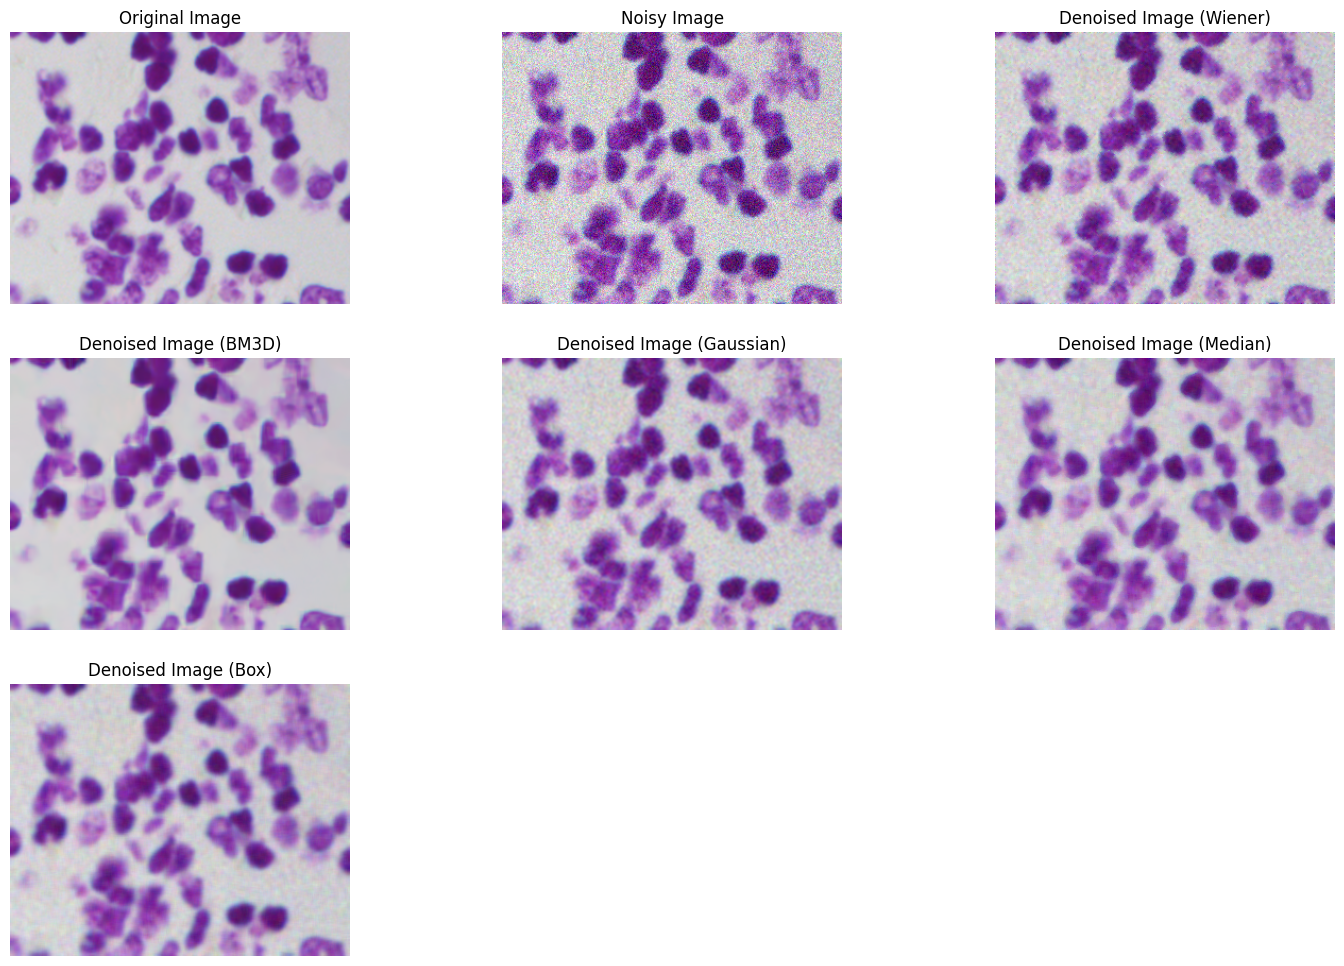

In [17]:
# Display results
def display_images(images, titles, figsize=(18, 12)):
    plt.figure(figsize=figsize)
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()
display_images(
    [image_rgb, noisy_image, denoised_image_wiener, denoised_image_bm3d,
     denoised_image_gaussian, denoised_image_median, denoised_image_box],
    ['Original Image', 'Noisy Image', 'Denoised Image (Wiener)', 'Denoised Image (BM3D)',
     'Denoised Image (Gaussian)', 'Denoised Image (Median)', 'Denoised Image (Box)']
)

In [18]:
# Calculate metrics
metrics = {
    "PSNR": peak_signal_noise_ratio,
    "MSE": mean_squared_error,
    "SSIM": structural_similarity
}



def print_metrics(original, noisy, denoised, method_name):
    print(f"\nMetrics for {method_name}:")
    for name, metric in metrics.items():
        if name == "SSIM":
            original_gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
            denoised_gray = cv2.cvtColor(denoised, cv2.COLOR_RGB2GRAY)
            value = metric(original_gray, denoised_gray)
        else:
            value = metric(original, denoised)
        print(f"{name}: {value:.4f}")


# Print metrics for noisy image compared to original
print_metrics(image_rgb, noisy_image, noisy_image, "Noisy Image")


Metrics for Noisy Image:
PSNR: 20.3145
MSE: 604.8227
SSIM: 0.4877


In [19]:
# Print metrics for each denoising method
print_metrics(image_rgb, noisy_image, denoised_image_wiener, "Wiener Filter")
print_metrics(image_rgb, noisy_image, denoised_image_bm3d, "BM3D Filter")
print_metrics(image_rgb, noisy_image, denoised_image_gaussian, "Gaussian Blur")
print_metrics(image_rgb, noisy_image, denoised_image_median, "Median Filter")
print_metrics(image_rgb, noisy_image, denoised_image_box, "Box Filter")


Metrics for Wiener Filter:
PSNR: 27.9924
MSE: 103.2371
SSIM: 0.8229

Metrics for BM3D Filter:
PSNR: 32.9800
MSE: 32.7404
SSIM: 0.9581

Metrics for Gaussian Blur:
PSNR: 30.6728
MSE: 55.6932
SSIM: 0.8912

Metrics for Median Filter:
PSNR: 30.2117
MSE: 61.9317
SSIM: 0.8929

Metrics for Box Filter:
PSNR: 31.2575
MSE: 48.6779
SSIM: 0.9213
